In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import exp
from tqdm import tqdm_notebook

In [4]:
from guess_query import GuessQueryProblem

In [2]:
%load_ext autoreload

In [10]:
problem = GuessQueryProblem(discount_factor=0.0001,
                             guess_correct_reward = 1,
                             guess_wrong_cost = 0,
                             query_cost = 0,
                             N = 101,
                             convergence_tol = 10e-5)

In [11]:
problem.solve()

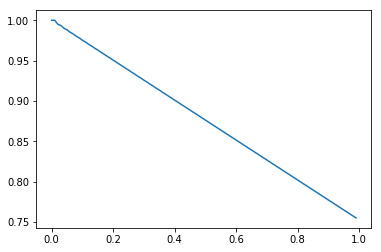

In [12]:
problem.plot(problem.expected_value_function, slice(0, -1))

In [ ]:
# As expected! You just get one guess...

In [84]:
problem = GuessQueryProblem(discount_factor=0.9,
                             guess_correct_reward = 1,
                             guess_wrong_cost = 0,
                             query_cost = 0,
                             N = 1001,
                             convergence_tol = 10e-5)

In [85]:
problem.solve()

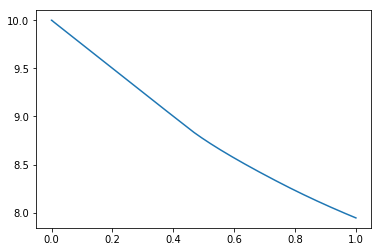

In [86]:
problem.plot(problem.expected_value_function, slice(0, -1))

In [101]:
def m0(beta):
    return 4 * (1 - beta) / beta

In [88]:
m0(0.9)

0.4444444444444443

In [89]:
m0_index = problem.always_guess_index()

In [90]:
m0 = problem.p_of_i(problem.always_guess_index())

In [91]:
m0

0.446

In [92]:
max_payoff = 1 / (1 - problem.discount_factor)

In [93]:
max_payoff

10.000000000000002

[1.71222998 1.3191345 ]


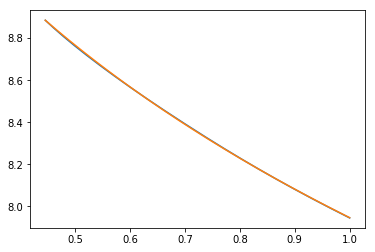

In [94]:
def f(x, b, c):
#     return b * x + c
    return max_payoff*(1 - m0/4) - b* np.log(1 + c*(x - m0))
#     return 100*(1 - 0.042/4) - b* np.log(c * x)


popt, pcov = curve_fit(f, problem.discretization[m0_index:], problem.expected_value_function[m0_index:])
print(popt)

plt.plot(problem.discretization[m0_index:], problem.expected_value_function[m0_index:])
plt.plot(problem.discretization[m0_index:], f(problem.discretization[m0_index:], *popt))

In [95]:
# Basically perfect again.

In [96]:
np.max(problem.expected_value_function[m0_index:] - f(problem.discretization[m0_index:], *popt))

0.0023362930904600177

In [ ]:
# Crazy my dudes! Max deviation goes from 0.01 to 0.002 when resolution is increased. 
# Seems that there are not multiple polynomial regions and log is not just an approximation--
# the region that enters when discount factor exceeds 0.8 is always logarithmically shaped,
# and does not have polynomial kinks corresponding to the number of possible guesses,
# as would be expected. Maybe it's worth playing out a couple of sample games and seeing what the opt
# algorithm does?

In [97]:
problem = GuessQueryProblem(discount_factor=0.999,
                             guess_correct_reward = 1,
                             guess_wrong_cost = 0,
                             query_cost = 0,
                             N = 1001,
                             convergence_tol = 10e-5)

In [98]:
problem.solve()

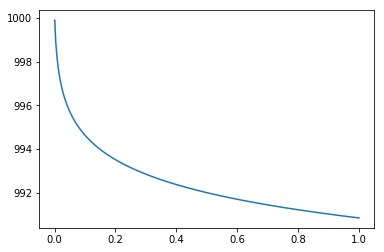

In [99]:
problem.plot(problem.expected_value_function, slice(0, -1))

In [102]:
m0(0.999)

0.0040040040040040074

In [103]:
m0_index = problem.always_guess_index()

In [104]:
m0 = problem.p_of_i(problem.always_guess_index())

In [105]:
m0

0.006

In [106]:
max_payoff = 1 / (1 - problem.discount_factor)

In [107]:
max_payoff

999.9999999999991

[ 1.67035883 96.85762685]


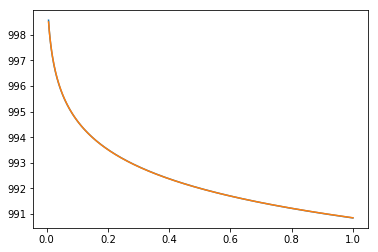

In [108]:
def f(x, b, c):
#     return b * x + c
    return max_payoff*(1 - m0/4) - b* np.log(1 + c*(x - m0))
#     return 100*(1 - 0.042/4) - b* np.log(c * x)


popt, pcov = curve_fit(f, problem.discretization[m0_index:], problem.expected_value_function[m0_index:])
print(popt)

plt.plot(problem.discretization[m0_index:], problem.expected_value_function[m0_index:])
plt.plot(problem.discretization[m0_index:], f(problem.discretization[m0_index:], *popt))

In [ ]:
# The damn b parameter is always the same. How to account for this??? But fit is basically perfect.

In [112]:
%autoreload

In [113]:
problem = GuessQueryProblem(discount_factor=0.99,
                             guess_correct_reward = 1,
                             guess_wrong_cost = 0,
                             query_cost = 0,
                             N = 1001,
                             convergence_tol = 10e-5)

In [114]:
problem.solve()

index: 0
OPT = guess
index: 1
OPT = guess
index: 2
OPT = guess
index: 3
OPT = guess
index: 4
OPT = guess
index: 5
OPT = guess
index: 6
OPT = guess
index: 7
OPT = guess
index: 8
OPT = guess
index: 9
OPT = guess
index: 10
OPT = guess
index: 11
OPT = guess
index: 12
OPT = guess
index: 13
OPT = guess
index: 14
OPT = guess
index: 15
OPT = guess
index: 16
OPT = guess
index: 17
OPT = guess
index: 18
OPT = guess
index: 19
OPT = guess
index: 20
OPT = guess
index: 21
OPT = guess
index: 22
OPT = query
index: 23
OPT = query
index: 24
OPT = query
index: 25
OPT = query
index: 26
OPT = query
index: 27
OPT = query
index: 28
OPT = query
index: 29
OPT = guess
index: 30
OPT = guess
index: 31
OPT = guess
index: 32
OPT = guess
index: 33
OPT = guess
index: 34
OPT = guess
index: 35
OPT = guess
index: 36
OPT = guess
index: 37
OPT = guess
index: 38
OPT = guess
index: 39
OPT = guess
index: 40
OPT = guess
index: 41
OPT = guess
index: 42
OPT = guess
index: 43
OPT = guess
index: 44
OPT = guess
index: 45
OPT = gues

index: 766
OPT = guess
index: 767
OPT = guess
index: 768
OPT = guess
index: 769
OPT = guess
index: 770
OPT = guess
index: 771
OPT = guess
index: 772
OPT = guess
index: 773
OPT = guess
index: 774
OPT = guess
index: 775
OPT = guess
index: 776
OPT = guess
index: 777
OPT = guess
index: 778
OPT = guess
index: 779
OPT = guess
index: 780
OPT = guess
index: 781
OPT = guess
index: 782
OPT = guess
index: 783
OPT = guess
index: 784
OPT = guess
index: 785
OPT = guess
index: 786
OPT = guess
index: 787
OPT = guess
index: 788
OPT = guess
index: 789
OPT = guess
index: 790
OPT = guess
index: 791
OPT = guess
index: 792
OPT = guess
index: 793
OPT = guess
index: 794
OPT = guess
index: 795
OPT = guess
index: 796
OPT = guess
index: 797
OPT = guess
index: 798
OPT = guess
index: 799
OPT = guess
index: 800
OPT = guess
index: 801
OPT = guess
index: 802
OPT = guess
index: 803
OPT = guess
index: 804
OPT = guess
index: 805
OPT = guess
index: 806
OPT = guess
index: 807
OPT = guess
index: 808
OPT = guess
index: 809


In [ ]:
# from 22 to 28 at index 50